In [25]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

import sys
print(sys.version) # version of Python
print(sklearn.__version__) # version of sklearn module

3.9.6 (default, Oct  4 2024, 08:01:31) 
[Clang 16.0.0 (clang-1600.0.26.4)]
1.5.2


### Data exploration

In [26]:
import pandas as pd

path = 'gamenew.csv'
data = pd.read_csv(path, delimiter=';', encoding='utf-8')
data.head()

,gender,age,education,FavouriteRole,LeastFavoriteRole,RoleMostPlay,RoleLeastPlay,BestRole,WorstRole,FavoritePosition,...,Q56,Q57,Q58,Q59,Q60,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,2,20,3,2,3,2,1,2,4,5,...,4,4,5,4,4,51,51,49,47,50
1,2,24,2,1,5,1,5,1,5,1,...,5,4,4,1,5,37,49,45,39,49
2,2,21,3,5,2,5,2,5,2,4,...,5,4,3,4,4,46,44,48,47,47
3,1,28,3,6,2,6,1,6,1,5,...,4,4,3,4,3,44,44,40,45,40
4,1,23,2,1,5,1,6,1,5,5,...,3,2,2,3,2,36,34,39,35,36


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 92 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 1058 non-null   int64 
 1   age                    1058 non-null   int64 
 2   education              1058 non-null   int64 
 3   FavouriteRole          1058 non-null   int64 
 4   LeastFavoriteRole      1058 non-null   int64 
 5   RoleMostPlay           1058 non-null   int64 
 6   RoleLeastPlay          1058 non-null   int64 
 7   BestRole               1058 non-null   int64 
 8   WorstRole              1058 non-null   int64 
 9   FavoritePosition       1058 non-null   int64 
 10  LeastFavoritePosition  1058 non-null   int64 
 11  BestPosition           1058 non-null   int64 
 12  WorstPosition          1058 non-null   int64 
 13  PositionMostPlay       1058 non-null   int64 
 14  PositionLeastPlay      1058 non-null   int64 
 15  three                

In [28]:
df = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole', 'WorstRole',
           'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay', 'PositionLeastPlay',
           'chengjie', 'zhongjie', 'kuangbao', 'jipao', 'zhiliao', 'ganrao', 'yunxuan', 'jinhua', 'ruohua', 'shanxian',
          'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness']]

In [29]:
rename_dict = {
    'chengjie': 'Punish', 
    'zhongjie': 'Ignite', 
    'kuangbao': 'Smite',
    'jipao': 'Ghost',
    'zhiliao': 'Heal', 
    'ganrao': 'Interfere', 
    'yunxuan': 'Stifle', 
    'jinhua':'Cleanse', 
    'ruohua':'Exhaust' ,
    'shanxian': 'Flash' 
}
df.rename(columns=rename_dict, inplace=True)


In [30]:
df.head()

,FavouriteRole,LeastFavoriteRole,RoleMostPlay,RoleLeastPlay,BestRole,WorstRole,FavoritePosition,LeastFavoritePosition,BestPosition,WorstPosition,...,Interfere,Stifle,Cleanse,Exhaust,Flash,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,2,3,2,1,2,4,5,1,5,1,...,0,0,0,0,1,51,51,49,47,50
1,1,5,1,5,1,5,1,4,1,4,...,0,0,0,0,1,37,49,45,39,49
2,5,2,5,2,5,2,4,3,4,3,...,0,0,0,0,1,46,44,48,47,47
3,6,2,6,1,6,1,5,2,5,1,...,0,0,0,0,0,44,44,40,45,40
4,1,5,1,6,1,5,5,1,4,1,...,0,0,0,0,1,36,34,39,35,36


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   FavouriteRole          1058 non-null   int64
 1   LeastFavoriteRole      1058 non-null   int64
 2   RoleMostPlay           1058 non-null   int64
 3   RoleLeastPlay          1058 non-null   int64
 4   BestRole               1058 non-null   int64
 5   WorstRole              1058 non-null   int64
 6   FavoritePosition       1058 non-null   int64
 7   LeastFavoritePosition  1058 non-null   int64
 8   BestPosition           1058 non-null   int64
 9   WorstPosition          1058 non-null   int64
 10  PositionMostPlay       1058 non-null   int64
 11  PositionLeastPlay      1058 non-null   int64
 12  Punish                 1058 non-null   int64
 13  Ignite                 1058 non-null   int64
 14  Smite                  1058 non-null   int64
 15  Ghost                  1058 non-null  

In [32]:
df.isnull().sum()

FavouriteRole            0
LeastFavoriteRole        0
RoleMostPlay             0
RoleLeastPlay            0
BestRole                 0
WorstRole                0
FavoritePosition         0
LeastFavoritePosition    0
BestPosition             0
WorstPosition            0
PositionMostPlay         0
PositionLeastPlay        0
Punish                   0
Ignite                   0
Smite                    0
Ghost                    0
Heal                     0
Interfere                0
Stifle                   0
Cleanse                  0
Exhaust                  0
Flash                    0
Neuroticism              0
Extraversion             0
Openness                 0
Agreeableness            0
Conscientiousness        0
dtype: int64

In [33]:
df = df.fillna(0)
df.isnull().sum()

FavouriteRole            0
LeastFavoriteRole        0
RoleMostPlay             0
RoleLeastPlay            0
BestRole                 0
WorstRole                0
FavoritePosition         0
LeastFavoritePosition    0
BestPosition             0
WorstPosition            0
PositionMostPlay         0
PositionLeastPlay        0
Punish                   0
Ignite                   0
Smite                    0
Ghost                    0
Heal                     0
Interfere                0
Stifle                   0
Cleanse                  0
Exhaust                  0
Flash                    0
Neuroticism              0
Extraversion             0
Openness                 0
Agreeableness            0
Conscientiousness        0
dtype: int64

In [34]:
df.FavouriteRole.value_counts()

FavouriteRole
1    298
6    251
2    159
4    155
5    137
3     58
Name: count, dtype: int64

In [35]:
df.FavoritePosition.value_counts()

FavoritePosition
2    321
1    216
3    202
4    188
5    131
Name: count, dtype: int64

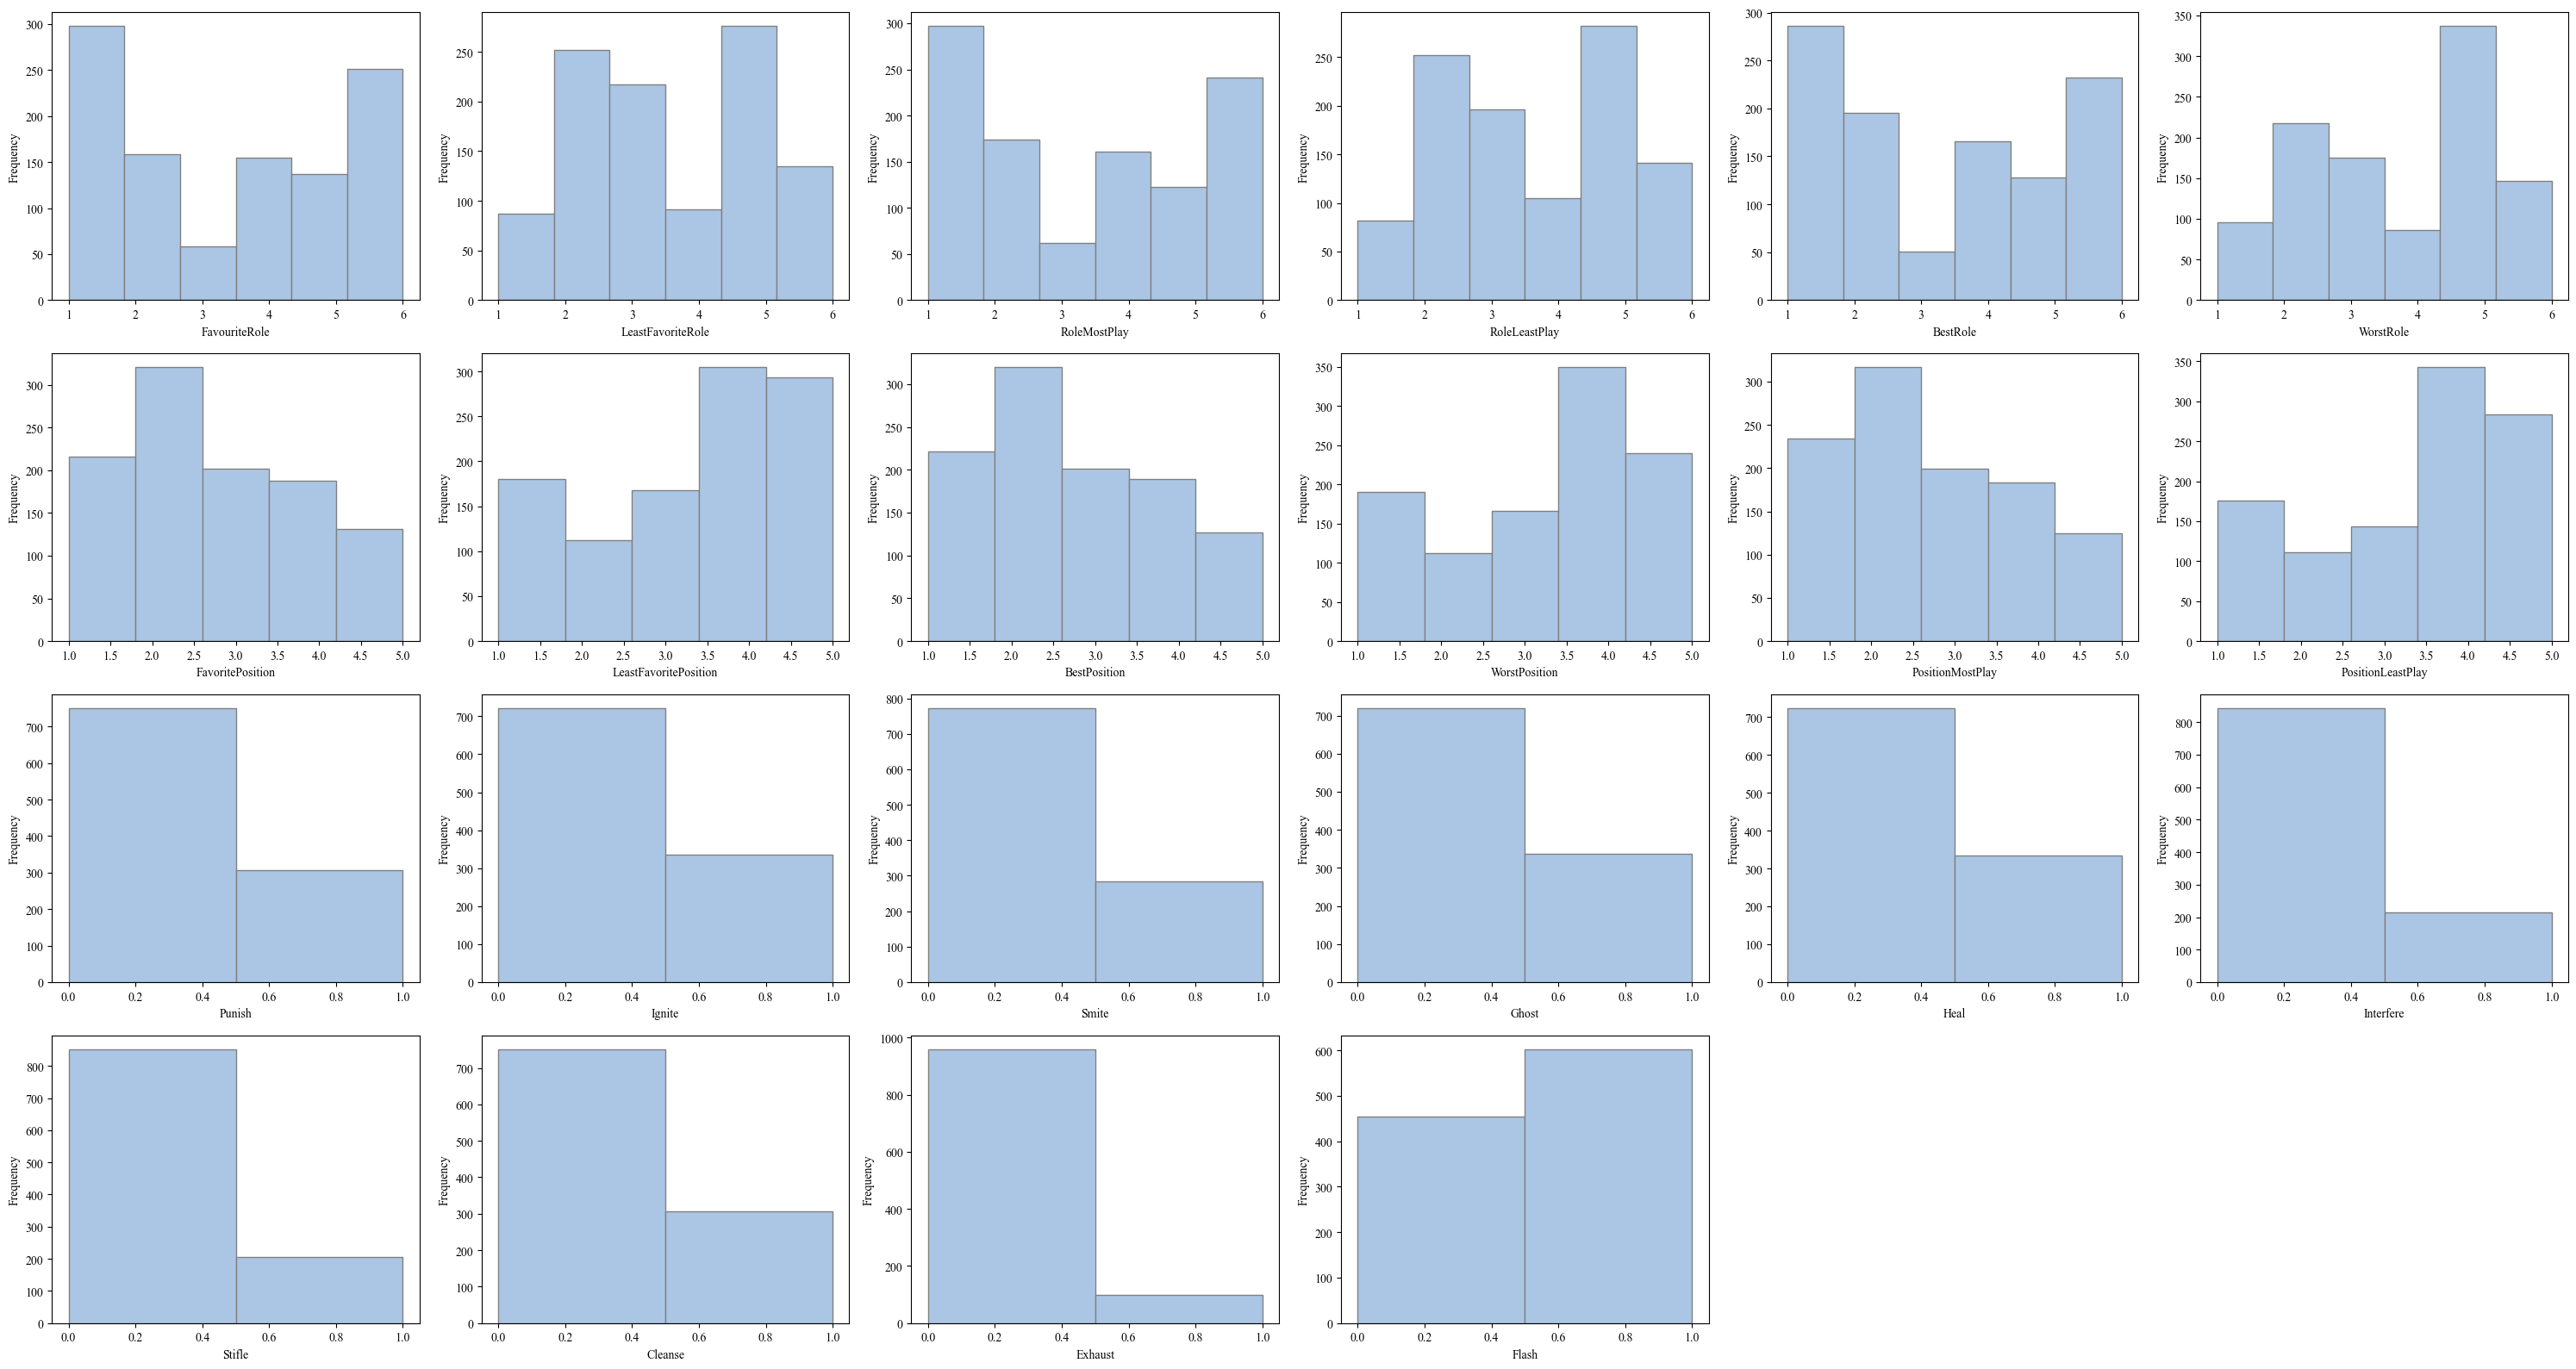

In [36]:


rcParams['font.family'] = 'Times New Roman'

columns_to_plot = [
    'FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 
    'BestRole', 'WorstRole', 'FavoritePosition', 'LeastFavoritePosition', 
    'BestPosition', 'WorstPosition', 'PositionMostPlay', 'PositionLeastPlay', 
    'Punish', 'Ignite', 'Smite', 'Ghost', 'Heal', 'Interfere', 'Stifle', 
    'Cleanse', 'Exhaust', 'Flash'
]


unique_counts = {column: df[column].dropna().nunique() for column in columns_to_plot}


n_cols = 6  
n_rows = len(columns_to_plot) // n_cols + (1 if len(columns_to_plot) % n_cols != 0 else 0)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 4 * n_rows)) 
axes = axes.flatten()  

for i, (column, num_bins) in enumerate(unique_counts.items()):
    ax = axes[i]  
    df[column].dropna().plot(kind='hist', bins=num_bins, color='#ABC6E4', edgecolor='black', ax=ax)
    
    ax.set_xlabel(f'{column}', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    
   
    ax.grid(False)  
    for bar in ax.patches:
        bar.set_edgecolor('gray')  
        bar.set_linewidth(1)  


for j in range(i + 1, len(axes)):  
    axes[j].axis('off')


plt.tight_layout()
plt.show()



In [37]:

df = pd.get_dummies(df, columns=[
    'FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole', 'WorstRole',
    'FavoritePosition', 'LeastFavoritePosition', 'BestPosition', 'WorstPosition', 'PositionMostPlay', 'PositionLeastPlay'
])


df = df.astype(int)

In [38]:
# calculate the median of each dependent feature 
print(df.Neuroticism.median())
print(df.Extraversion.median())
print(df.Openness.median())
print(df.Agreeableness.median())
print(df.Conscientiousness.median())

28.0
47.0
46.0
43.0
50.0


In [39]:

neuroticism_mean = df.Neuroticism.mean()
neuroticism_std = df.Neuroticism.std()

extraversion_mean = df.Extraversion.mean()
extraversion_std = df.Extraversion.std()

openness_mean = df.Openness.mean()
openness_std = df.Openness.std()

agreeableness_mean = df.Agreeableness.mean()
agreeableness_std = df.Agreeableness.std()

conscientiousness_mean = df.Conscientiousness.mean()
conscientiousness_std = df.Conscientiousness.std()


print("Neuroticism: Mean = {:.2f}, Std Dev = {:.2f}".format(neuroticism_mean, neuroticism_std))
print("Extraversion: Mean = {:.2f}, Std Dev = {:.2f}".format(extraversion_mean, extraversion_std))
print("Openness: Mean = {:.2f}, Std Dev = {:.2f}".format(openness_mean, openness_std))
print("Agreeableness: Mean = {:.2f}, Std Dev = {:.2f}".format(agreeableness_mean, agreeableness_std))
print("Conscientiousness: Mean = {:.2f}, Std Dev = {:.2f}".format(conscientiousness_mean, conscientiousness_std))

Neuroticism: Mean = 30.06, Std Dev = 10.67
Extraversion: Mean = 44.65, Std Dev = 7.72
Openness: Mean = 45.22, Std Dev = 6.88
Agreeableness: Mean = 42.79, Std Dev = 6.62
Conscientiousness: Mean = 48.43, Std Dev = 7.22


In [40]:
# low:0; high:1
df['Neuroticism'] = df['Neuroticism'].apply(lambda x: 0 if x < 28 else 1 )
df['Extraversion'] = df['Extraversion'].apply(lambda x: 0 if x < 47 else 1 )
df['Openness'] = df['Openness'].apply(lambda x: 0 if x < 46 else 1 )
df['Agreeableness'] = df['Agreeableness'].apply(lambda x: 0 if x < 43 else 1)
df['Conscientiousness'] = df['Conscientiousness'].apply(lambda x: 0 if x < 50 else 1 )

In [41]:
df.Neuroticism.value_counts()

Neuroticism
1    531
0    527
Name: count, dtype: int64

In [42]:
df.Extraversion.value_counts()

Extraversion
1    530
0    528
Name: count, dtype: int64

In [43]:
df.Openness.value_counts()

Openness
1    577
0    481
Name: count, dtype: int64

In [44]:
df.Agreeableness.value_counts()

Agreeableness
1    584
0    474
Name: count, dtype: int64

In [45]:
df.Conscientiousness.value_counts()

Conscientiousness
1    534
0    524
Name: count, dtype: int64

In [46]:
df.to_csv('game_data.csv', index=False)

#### Open the new created data for examination

In [47]:
path = 'game_data.csv'
data = pd.read_csv(path, delimiter=',', encoding='utf-8')
data.head()

,Punish,Ignite,Smite,Ghost,Heal,Interfere,Stifle,Cleanse,Exhaust,Flash,...,PositionMostPlay_1,PositionMostPlay_2,PositionMostPlay_3,PositionMostPlay_4,PositionMostPlay_5,PositionLeastPlay_1,PositionLeastPlay_2,PositionLeastPlay_3,PositionLeastPlay_4,PositionLeastPlay_5
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Punish                   1058 non-null   int64
 1   Ignite                   1058 non-null   int64
 2   Smite                    1058 non-null   int64
 3   Ghost                    1058 non-null   int64
 4   Heal                     1058 non-null   int64
 5   Interfere                1058 non-null   int64
 6   Stifle                   1058 non-null   int64
 7   Cleanse                  1058 non-null   int64
 8   Exhaust                  1058 non-null   int64
 9   Flash                    1058 non-null   int64
 10  Neuroticism              1058 non-null   int64
 11  Extraversion             1058 non-null   int64
 12  Openness                 1058 non-null   int64
 13  Agreeableness            1058 non-null   int64
 14  Conscientiousness        1058 non-null   int64
 15  Favo